# Advertising Sales Channel Prediction

Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Importing the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

checking the first five rows of the dataset

In [3]:

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Lets start the EDA process on this Dataset



Checking the number of rows and columns of the dataset

In [5]:
df.shape

(200, 5)

This dataset contains 200 rows and 5 columns

Checking the Datatypes of all the values of the Dataset

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

As we can see above all the variables' values are of either integer or float datatype.Means all values

are continuous.


Checking the names of all columns separatel

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Missing Values Detection

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

we dont have any null value in any column.

# Outliers' Detection

Plotting the boxplots for detecting the outliers

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:xlabel='TV'>

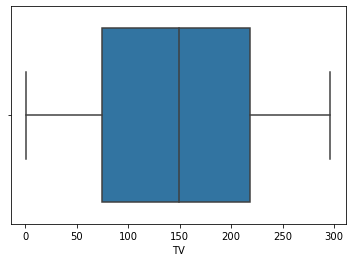

In [10]:
sns.boxplot(df['TV'])

There are not outliers in column TV

sns.boxplot(df['radio'])

There is not outlier present in 'radio' column

<AxesSubplot:xlabel='newspaper'>

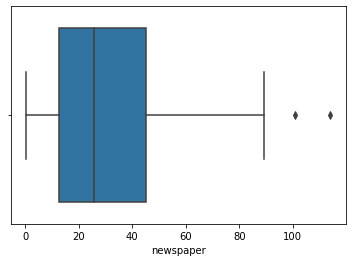

In [11]:
sns.boxplot(df['newspaper'])


We can see there are 2 outliers present in 'newspaper' column

<AxesSubplot:xlabel='sales'>

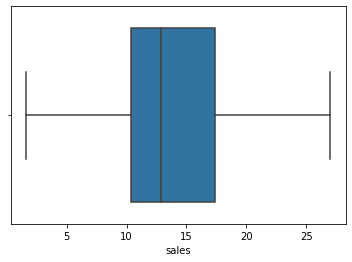

In [12]:
sns.boxplot(df['sales'])

There is no outlier present in 'sales' column.

# Removal of Outliers

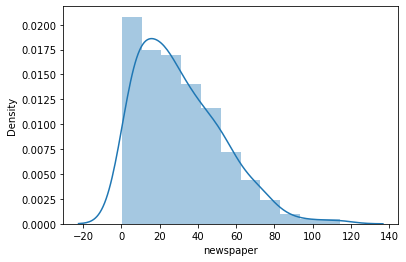

In [13]:
sns.distplot(df['newspaper']);

The distribution plot of the count values reveals that the count values do not match a

normal distribution. We will use the median and interquartile range (IQR) to identify and

remove outliers from the data. (An alternative approach would be the transformation of the

target values to a normal distribution and using mean and standard deviation

Samples in dataset with outliers: 200
Samples in dataset without outliers: 198


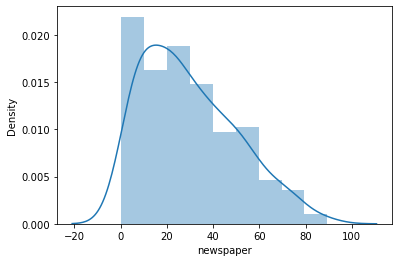

In [14]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.newspaper.quantile(0.25)
q3 = df.newspaper.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df_preprocessed = df.loc[(df.newspaper >= lower_bound) & (df.newspaper <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df_preprocessed)))
sns.distplot(df_preprocessed.newspaper);

Now the outliers have been removed.

# Checking Skewness in the Dataset

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

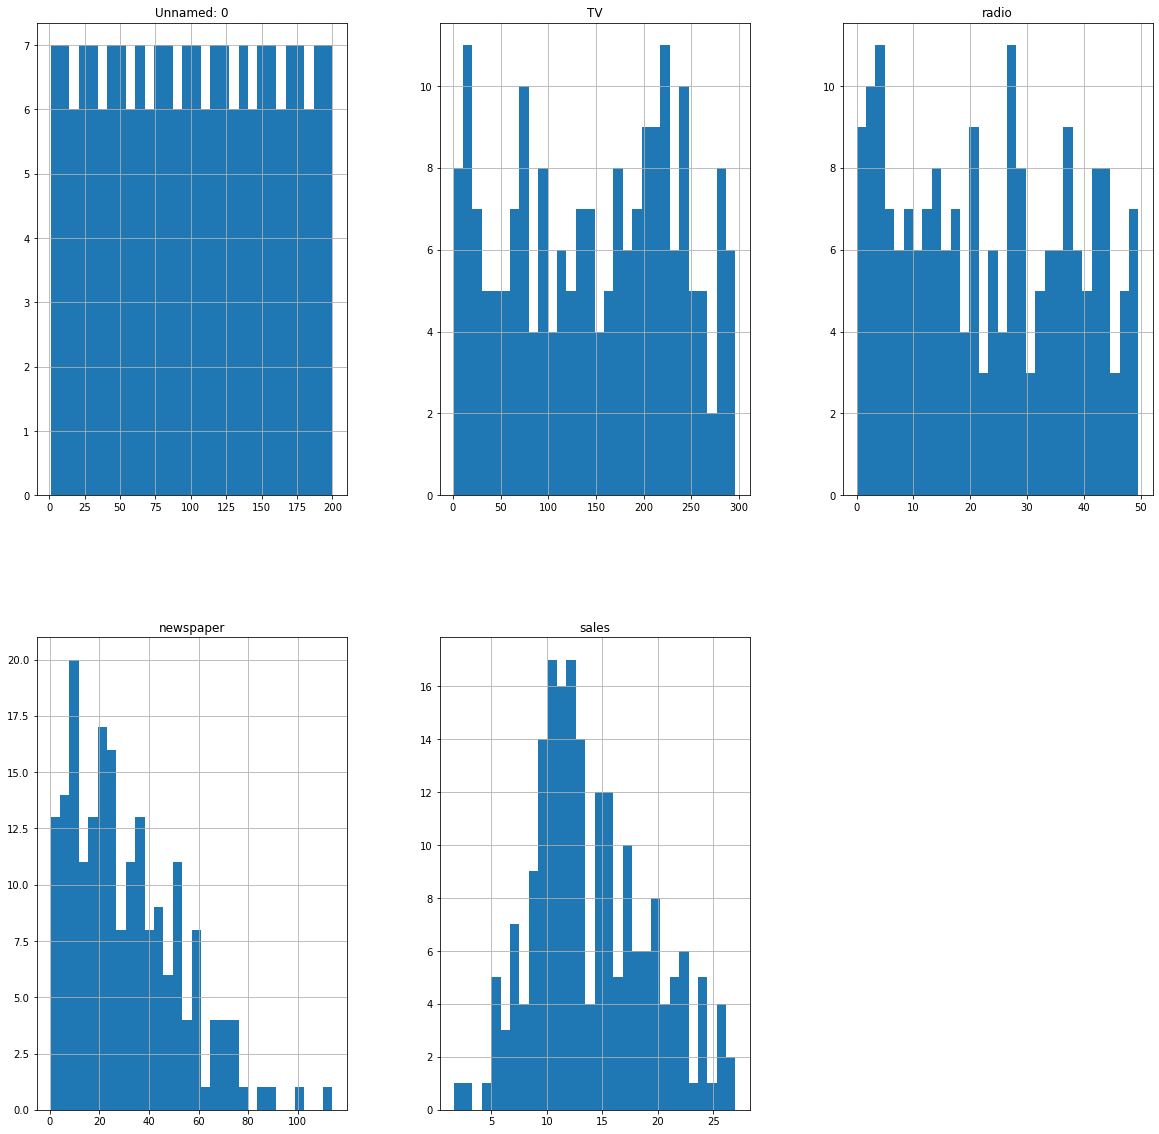

In [15]:
df.hist(figsize=(20,20), grid = True, layout = (2,3), bins = 30)

From above visualization ,we can see that column 'newspaper' is somewhat skewed.

# Removal of Skewness


We will take the log of the 'newspaper' column to remove the skewness

In [16]:
df['newspaper']=np.log(df['newspaper'])

# Correlation Analysis

In [17]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.103069,-0.051616
TV,0.017715,1.000000,0.054809,0.024189,0.782224
radio,-0.110680,0.054809,1.000000,0.237159,0.576223
newspaper,-0.103069,0.024189,0.237159,1.000000,0.151936
sales,-0.051616,0.782224,0.576223,0.151936,1.000000


<AxesSubplot:>

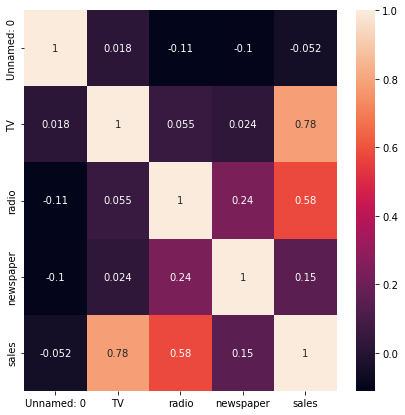

In [18]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),color ='k',annot=True)

After descriptive analysis we can say that--

Strong relationship between TV ads and sales

Weak relationship between Radio ads and sales

Very weak to no relationship between Newspaper ads and sales

visualize the relationship between the features and the response using scatterplots

this produces pairs of scatterplot as shown

use aspect= to control the size of the graphs

use kind='reg' to plot linear regression on the grap

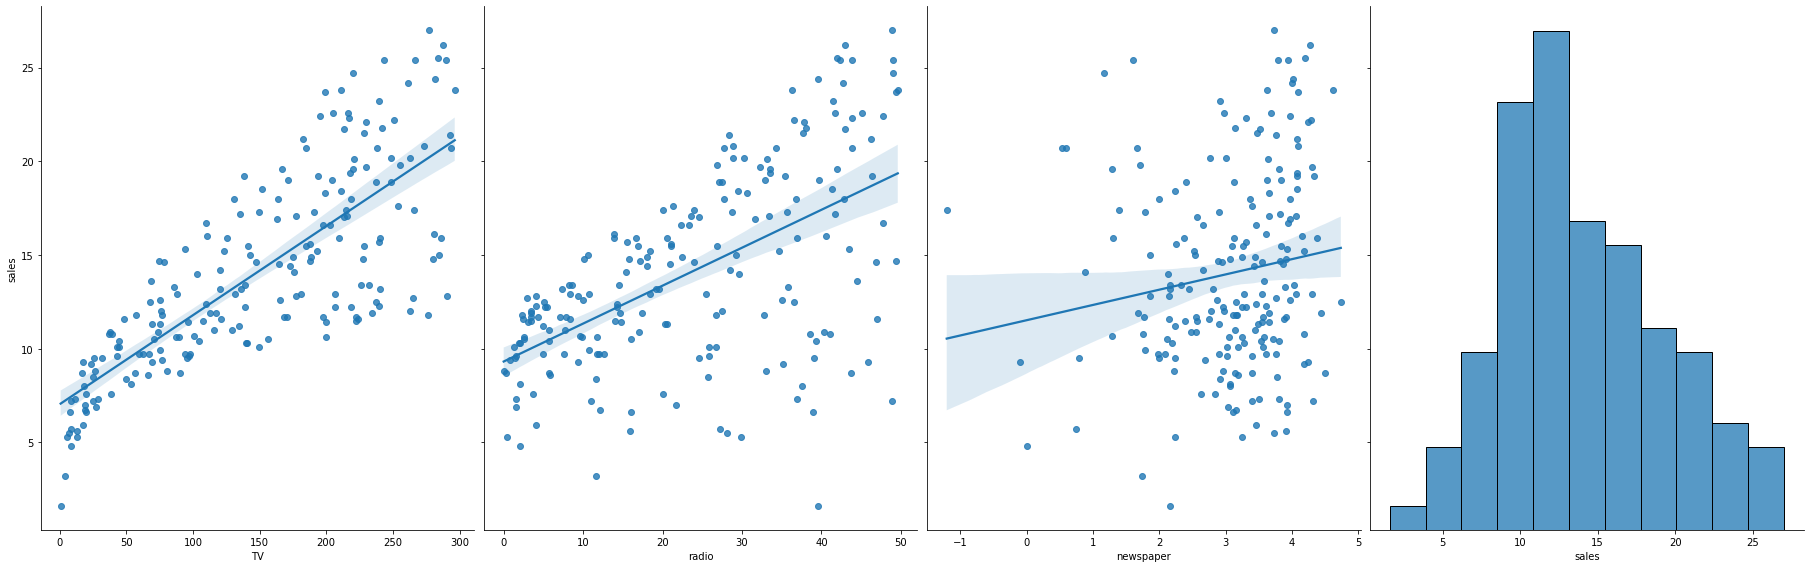

In [19]:
sns.pairplot(df,x_vars=['TV','radio','newspaper','sales'],y_vars='sales',size=8,aspect=.8,kind='reg')

Strong relationship between TV ads and sales

Weak relationship between Radio ads and sales

Very weak to no relationship between Newspaper ads and sales

<AxesSubplot:xlabel='sales'>

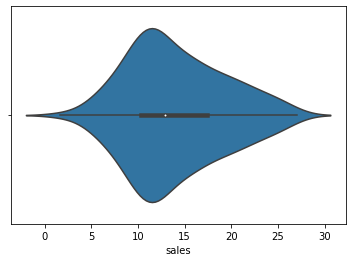

In [20]:
#plotting the graph for visualizing better the distribution of "sales" variable.
sns.violinplot(x='sales', data=df)

<AxesSubplot:xlabel='TV'>

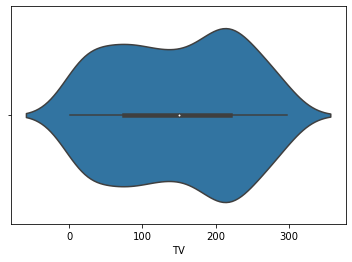

In [21]:
#plotting the graph for visualizing better the distribution of "TV" variable.
sns.violinplot(x='TV', data=df)

<AxesSubplot:xlabel='radio'>

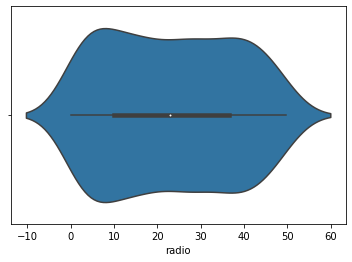

In [22]:
#plotting the graph for visualizing better the distribution of "radio" variable.
sns.violinplot(x='radio', data=df)

<AxesSubplot:xlabel='newspaper'>

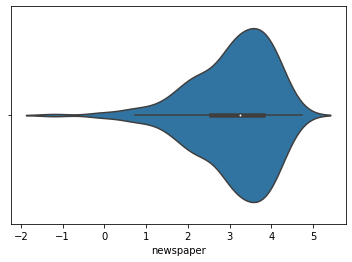

In [23]:
#plotting the graph for visualizing better the distribution of "newspaper" variable.
sns.violinplot(x='newspaper', data=df)

In [25]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Preparing X and y using pandas

scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays

However, pandas is built on top of NumPy

Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [26]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = df[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
0,230.1,37.8,4.237001
1,44.5,39.3,3.808882
2,17.2,45.9,4.238445
3,151.5,41.3,4.069027
4,180.8,10.8,4.067316


In [27]:

# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [28]:
# select a Series from the DataFrame
y = df['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the sales as an attribute of the DataFrame
y = df.sales

# print the first 5 values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [29]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Divide the dataset into training and testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Using Standard Scaling for making Data Standardized

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Model Selection

Model Selection
The characteristics of the given problem are:

Regression: The target variable is a quantity.

Small dataset: Less than 100K samples.

Few features should be important: The correlation matrix indicates that a few features contain the information to predict the target variable.

This characteristic makes the following methods most promising: Ridge Regression, Support Vector Regression, Ensemble Regressor, Random Forest Regressor.

Overview Metrics Mean Squared Error (MSE)

Root Mean Squared Logarithmic Error (RMSLE) RMSLE

R2 Score

We will evaluate the performance of these models in the following:

In [34]:
from sklearn.metrics import r2_score
model= [
    Lasso(alpha=0.1),
    Ridge(alpha=.5),
    
    RandomForestRegressor( random_state=0, n_estimators=300)
]

In [35]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred=m.predict(X_test)
    print('mean absolute error ',(mean_absolute_error(y_test,pred)))
    print('mean squared error ',(mean_squared_error(y_test,pred)))
    print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

mean absolute error  1.4312594905411122
mean squared error  2.7667507089296044
root mean squared error  1.6633552563807903


mean absolute error  1.4337686437197903
mean squared error  2.87204478927581
root mean squared error  1.6947108276268874


mean absolute error  1.102420000000008
mean squared error  2.7322414022222334
root mean squared error  1.6529493041900085




# Hyper Parameter Tuning

As we see above scores, the minimum error is given by 'Random Forest Regressor'

So we will choose Randon Forest Regressor for further improvement

In [36]:
rf=RandomForestRegressor(n_estimators=300,random_state=0)

In [37]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [38]:
rf.score(X_train,y_train)

0.9966344313158572

In [39]:
pred=rf.predict(X_test)
pred

array([22.87066667, 15.58233333,  9.13666667, 13.09966667, 16.16433333,
       25.58833333, 16.562     , 12.54766667, 10.168     , 16.18266667,
       14.39033333, 10.16233333, 16.33566667, 14.833     , 12.08866667,
       14.772     , 12.517     , 11.779     ,  3.054     , 18.005     ,
        9.57333333, 10.82966667,  3.97733333, 10.25833333, 11.655     ,
       14.56433333,  7.258     , 19.305     , 18.47533333, 15.55466667,
       23.36566667, 11.50166667, 16.558     , 11.42233333, 20.047     ,
       14.908     , 11.50833333, 10.612     , 21.91966667,  3.243     ,
        3.848     ,  9.00666667,  3.932     , 18.287     ,  3.91333333,
       13.64733333, 12.27633333, 21.65366667, 21.57866667, 19.88466667])

In [40]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  1.102420000000008
mean squared error  2.7322414022222334
root mean squared error  1.6529493041900085


In [41]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8831538371240732


# Cross Validation Score on Random Forest Regressor

In [42]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9682479034973387

In [43]:
print(r2_score(y_test,pred))

0.8831538371240732


# Linear Regression

In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8905174794880327

In [45]:
pred=lr.predict(X_test)
pred

array([21.68030531, 15.87232863,  6.13628407, 17.38280211, 18.28222863,
       23.96993315, 15.76989418, 12.58900164,  7.94976571, 16.86370035,
       13.71500406,  8.65688019, 16.55593099, 16.22274208, 14.36621709,
       14.94864048, 11.51181535, 16.61780301,  9.98054816, 17.54335894,
        7.89151885, 11.98826941,  7.54505951,  9.25794285, 10.37214671,
       14.30149239,  8.63075713, 19.13120571, 17.63750088, 16.64538167,
       21.47809938, 13.92000176, 15.57659374, 11.3932633 , 19.70385512,
       14.67287057, 13.05809146,  8.88707659, 20.82348175,  6.04208246,
        1.89553722,  5.80049378,  4.46697068, 18.08513893,  7.10383907,
       13.30858906, 14.36426168, 20.19761993, 20.41501688, 19.32399073])

In [47]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  1.4348580802124302
mean squared error  2.885277469274064
root mean squared error  1.6986104524799275


In [48]:
print(r2_score(y_test,pred))

0.8766091455744592


# Cross Validation on Linear Regression Model

In [49]:
# Now lets try to do some evaluation for linear regressor using cross validation.
lr_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
lr_eval.mean()

0.860455218329308

# Using Ensemble Technique to avoid Overfitting

'Using Adaboost Regressor'

In [50]:
from sklearn.ensemble import AdaBoostRegressor
adboost=AdaBoostRegressor()
adboost.fit(X_train,y_train)
print(adboost.score(X_train,y_train))
abpred=adboost.predict(X_test)
print(abpred)
adboost.score(X_test,y_test)

0.9746924246654368
[22.58780488 16.34545455 10.76363636 13.44285714 16.82162162 24.78125
 16.26666667 12.78181818  9.79411765 16.91428571 14.75714286 10.34090909
 16.82162162 14.675      12.78181818 15.44864865 13.15384615 12.52857143
  2.4        19.09032258 10.76363636 10.7         3.8        11.09565217
 11.78       14.75714286  7.6        19.17222222 17.67021277 14.75714286
 23.41935484 12.58888889 16.26666667 11.81       19.37647059 15.365625
 12.5        11.33529412 22.03333333  3.8         3.8        10.55517241
  3.8        19.22424242  3.1125     14.68139535 11.97222222 22.22592593
 21.91388889 19.41428571]


0.8745023192886218

In [51]:
print(r2_score(y_test,abpred))

0.8745023192886218


# Cross Validation on AdaBooster Model

In [52]:
#Now lets try to do some evaluation for random forest model using cross validation.
ada_eval = cross_val_score(estimator = adboost, X = X_train, y = y_train, cv = 10)
ada_eval.mean()

0.9375791591320602

If we observe all the values above ,we can see the Maximum Score comes in AdaBooster Model after Cross

Validation Technique i.e. 94%.Hence saving th best model and it's values.

which is AdaBoost Regressor

# Storing the predicted results in csv file

In [53]:
abpred=pd.DataFrame(abpred,columns=['abpred']).to_csv('Advertising')

# Saving the best Model as a pickle in a file

I have selected AdaBoosterRegressor Model as best model as it is giving me best score after

performing overfitting

In [54]:
#to save the model
import joblib
joblib.dump(model,'Advertising Sales Channel Prediction.pkl')

['Advertising Sales Channel Prediction.pkl']